# The following project is related to the salaries of Data Science employes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Insighting and Understanding the data

In [2]:
r_file=pd.read_csv("E:\\VS All languages practice\\Intro_to_Python\\Projects\\My projects\\2nd_proj_DS_Salaries\\ds_salaries.csv")
r_file # reading the data, this variable will be used further

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


##### Information about the data

In [3]:
r_info=r_file.info
r_info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

##### Checking for null values

In [4]:
# checking the null values
r_file.isnull().sum() 

# Since it can be seen from the results below that there is not any null value oresent in our dataset

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### Names of all jobs

In [5]:
r_file['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

# 2. Processing the data

##### Since some columns look useless, therefore, by droping them we get

In [6]:
r_file.drop(['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence'], axis=1, inplace=True)
r_file.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
5,2020,EN,FT,Data Analyst,72000,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,100,US,S
7,2020,MI,FT,Data Scientist,35735,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,50,NZ,S


##### Information after dropping the un_required columns

In [7]:
ar_info=r_file.info
ar_info

<bound method DataFrame.info of      work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary_in_usd 

##### Changing the column names to ensure readibility

In [8]:
rename_cols={'work_year':'Year', 'experience_level':'Experience', 'employment_type':'Type','job_title':'Title','salary_in_usd':'Salary($)'}
r_file.rename(columns=rename_cols, inplace=True)
r_file

,Year,Experience,Type,Title,Salary($),remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


##### Changing some names of columns to insure the readibility easier

In [9]:
from os import rename
r_cols={"work_year":"Year", "experience_level":"Experience", "employment_type":"Work_Type", "job_title":"Title","salary_in_usd":"Salary ($)","employee_residence":"Staff_residence", "remote_ratio":"Remote_ratio" }
r_file.rename(columns=r_cols, inplace=True)
r_file.head(10)

,Year,Experience,Type,Title,Salary($),Remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
5,2020,EN,FT,Data Analyst,72000,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,100,US,S
7,2020,MI,FT,Data Scientist,35735,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,50,NZ,S


##### Discriptive analysis of data

In [10]:
r_file.describe()

,Year,Salary($),Remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


##### Changing some terminologies for our ease
###### 1. From Experience
##### 1. --> MI = Mid Level
###### 2. --> SE = Senior Level
###### 3. --> EN = Entry level
##### 2. From Work_type
###### 1. --> FT = Full Time
###### 2. --> PT = part Time
###### 3. --> CT = Contract
###### 4. --> else Freelance
##### 3. From Remote_ratio
###### 1. --> 0 = Not remote work
###### 2. --> 50 = Partially remote
###### 3. --> above 50 = Fully remote
##### 4. From company_size
###### 1. --> L = Large
###### 2. --> M = Medium
###### 3. --> S = Small

In [11]:
i = 0
for i in range(r_file['Experience'].shape[0]): # will trace the columns
    if r_file['Experience'][i] == "EN":
        r_file['Experience'][i] = "Entry Level"
    elif r_file['Experience'][i] == "MI":
        r_file['Experience'][i] = "Mid Level"
    elif r_file['Experience'][i] == "SE":
        r_file['Experience'][i] = "Senior Level"
    else:
        r_file['Experience'][i] = "Executive Level"

for i in range(r_file['Type'].shape[0]):
    if r_file['Type'][i]=="FT":
        r_file['Type'][i]="Full Time"
    elif r_file['Type'][i]=="PT":
        r_file['Type'][i]="Part Time"
    elif r_file['Type'][i]=="CT":
        r_file['Type'][i]="Contract"
    else:
        r_file['Title'][i]="Freelance"

for i  in range(r_file['Remote_ratio'].shape[0]):
    if r_file['Remote_ratio'][i]==0:
        r_file['Remote_ratio'][i]="Onsite"
    elif r_file['Remote_ratio'][i]==50:
        r_file['Remote_ratio'][i]="Partially Remote"
    else:
        r_file['Remote_ratio'][i]="Fully Remote"

for i in range(r_file['company_size'].shape[0]):
    if r_file['company_size'][i]=="L":
        r_file['company_size'][i]="Large"
    elif r_file['company_size'][i]=="M":
        r_file['company_size'][i]="Medium"
    else:
        r_file['company_size'][i]="Small"

C:\Users\admin\AppData\Local\Temp\ipykernel_8372\302924434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_file['Experience'][i] = "Mid Level"
C:\Users\admin\AppData\Local\Temp\ipykernel_8372\302924434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_file['Experience'][i] = "Senior Level"
C:\Users\admin\AppData\Local\Temp\ipykernel_8372\302924434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_file['Experience'][i] = "

In [12]:
r_file.head(10)

,Year,Experience,Type,Title,Salary($),Remote_ratio,company_location,company_size
0,2020,Mid Level,Full Time,Data Scientist,79833,Onsite,DE,Large
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,Onsite,JP,Small
2,2020,Senior Level,Full Time,Big Data Engineer,109024,Partially Remote,GB,Medium
3,2020,Mid Level,Full Time,Product Data Analyst,20000,Onsite,HN,Small
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,Partially Remote,US,Large
5,2020,Entry Level,Full Time,Data Analyst,72000,Fully Remote,US,Large
6,2020,Senior Level,Full Time,Lead Data Scientist,190000,Fully Remote,US,Small
7,2020,Mid Level,Full Time,Data Scientist,35735,Partially Remote,HU,Large
8,2020,Mid Level,Full Time,Business Data Analyst,135000,Fully Remote,US,Large
9,2020,Senior Level,Full Time,Lead Data Engineer,125000,Partially Remote,NZ,Small


##### View the names of total number of columns

In [13]:
r_file.columns

Index(['Year', 'Experience', 'Type', 'Title', 'Salary($)', 'Remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

##### View the Separated numerical and alphabatical columns

In [14]:
num_cols=r_file.select_dtypes('number') # this will check the columns with numerical data
alp_cols=r_file.select_dtypes('O') # this will check the columns containing alphabets

print(f"Numerical columns     -->: {num_cols.columns}\n")
print(f"Non_numerical Columns -->: {alp_cols.columns}")

Numerical columns     -->: Index(['Year', 'Salary($)'], dtype='object')

Non_numerical Columns -->: Index(['Experience', 'Type', 'Title', 'Remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


# 3. Graphical Representations

##### Grouping the job titles to see the total number of jobs wrt titles

In [15]:
grp_titles=r_file.groupby('Title').size().reset_index().sort_values(by=0, ascending=False)
grp_titles.columns=['Title', 'Total']
grp_titles

,Title,Total
22,Data Scientist,142
17,Data Engineer,131
12,Data Analyst,97
39,Machine Learning Engineer,41
49,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
15,Data Analytics Manager,7
1,AI Scientist,7


##### Displaying grouped job titles with the help of bar graphs

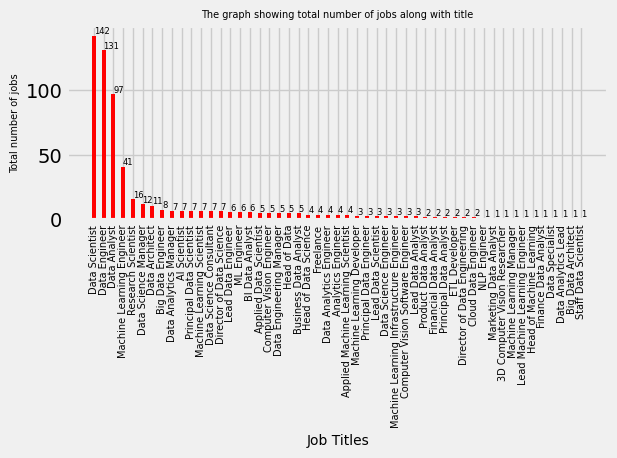

In [16]:
from turtle import color

plt.style.use('fivethirtyeight')
plt.bar(data=grp_titles, x='Title', height='Total', color='r', width=0.4)
plt.title("The graph showing total number of jobs along with title", fontsize=7)
plt.xlabel("Job Titles", fontsize=10)
plt.xticks(fontsize=7, ha='center', rotation=90)
plt.ylabel("Total number of jobs", fontsize=7)

i=0
for i in range(len(grp_titles)):
    position = grp_titles['Title'].loc[i]
    height = grp_titles['Total'].loc[i] + 1
    text = str(grp_titles['Total'].loc[i])
    plt.text(position,height,text, fontsize = 6)

plt.tight_layout()
plt.show()

##### Dsiplaying the salary of top 20 jobs

##### Sorting the data in Descending Order with respective to Salary

In [17]:
r_file.sort_values(by = ["Salary($)"], ascending=False, inplace=True) # this will sort the data wrt salary

C:\Users\admin\AppData\Local\Temp\ipykernel_8372\1747241729.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  top_20_jobs=r_file[{"Title", "Salary($)"}].head(20)


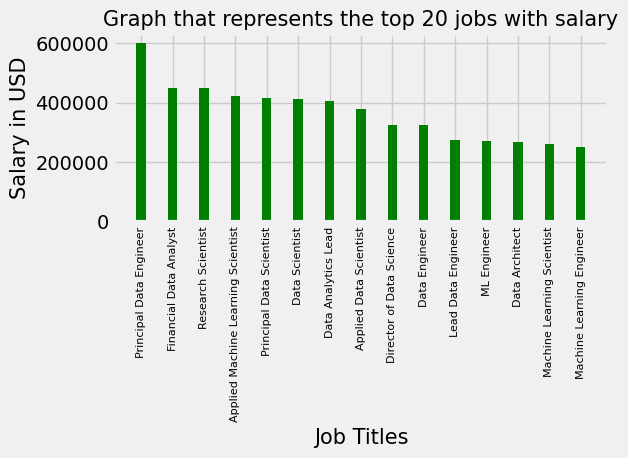

In [18]:
top_20_jobs=r_file[{"Title", "Salary($)"}].head(20)
# top_20_jobs
plt.style.use('fivethirtyeight')
plt.bar(data=top_20_jobs, x='Title', height='Salary($)',color='Green', width=0.3)
plt.title("Graph that represents the top 20 jobs with salary", fontsize=15)
plt.xlabel('Job Titles', fontsize=15)
plt.xticks(fontsize=8,rotation=90, ha='center')
plt.ylabel("Salary in USD", fontsize=15)

# i=0
# for i in range(len(top_20_jobs)):
#     # position = top_20_jobs['Title'].loc[i]
#     height = top_20_jobs['Salary($)'].loc[i] + 1
#     text = str(top_20_jobs['Salary($)'].loc[i])
#     plt.text(position,height,text, fontsize = 6)

plt.tight_layout()
plt.show()
# plt.bar(data=top_10_jobs, )

##### Showing the total number of work type in a pie chart form

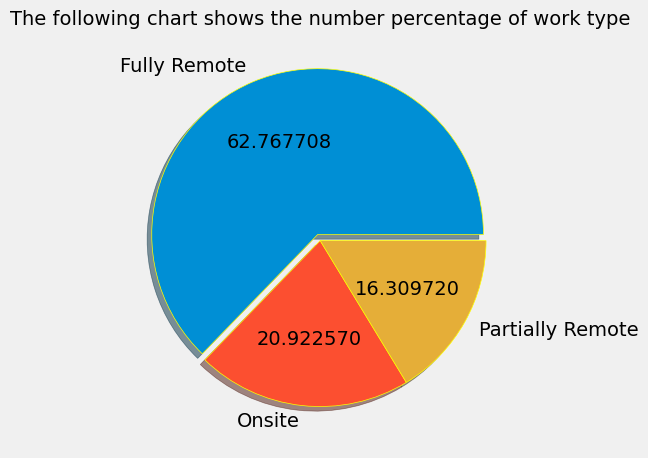

In [19]:
remote=r_file.groupby('Remote_ratio').size().reset_index().sort_values(by=0, ascending=False).head(10)
remote.columns=['Title', 'Total']
# remote  # this will show the total number of work type along with work type title
tot_remote=np.array(remote['Total']).flatten()
# tot_remote  # this will show total number of work type in an array formate

tit_remote=np.array(remote['Title']).flatten()
# tit_remote  # this will show work type in an array formate
expl=[0.04,0,0]
plt.style.use('fivethirtyeight')
plt.pie(tot_remote, explode=expl, labels=tit_remote, autopct='%f', shadow=True, wedgeprops={'edgecolor':'Yellow'})

plt.title("The following chart shows the number percentage of work type", fontdict={'fontsize':14})
plt.tight_layout()
plt.show()


##### Showing the experience levels in a pie chart form

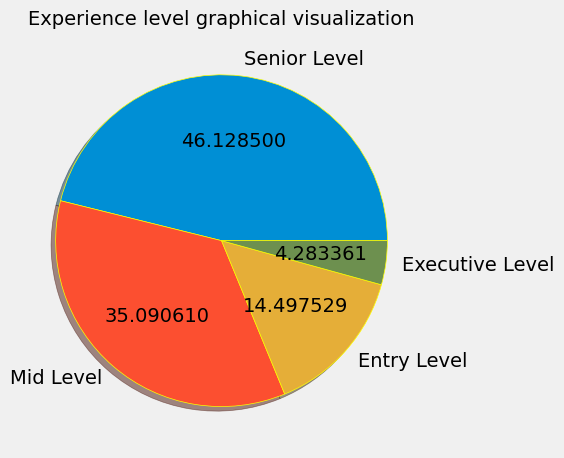

In [20]:
expr=r_file.groupby('Experience').size().reset_index().sort_values(by=0, ascending=False)
expr.columns=['Experience', 'Total']
tit_expr=np.array(expr['Experience']).flatten()
tit_expr

tot_expr=np.array(expr['Total']).flatten()
tot_expr

plt.style.use('fivethirtyeight')
plt.pie(tot_expr, labels=tit_expr, autopct='%f', wedgeprops={'edgecolor':'Yellow'}, shadow=True)
plt.title("Experience level graphical visualization", fontsize=14)
plt.tight_layout()
plt.show()
